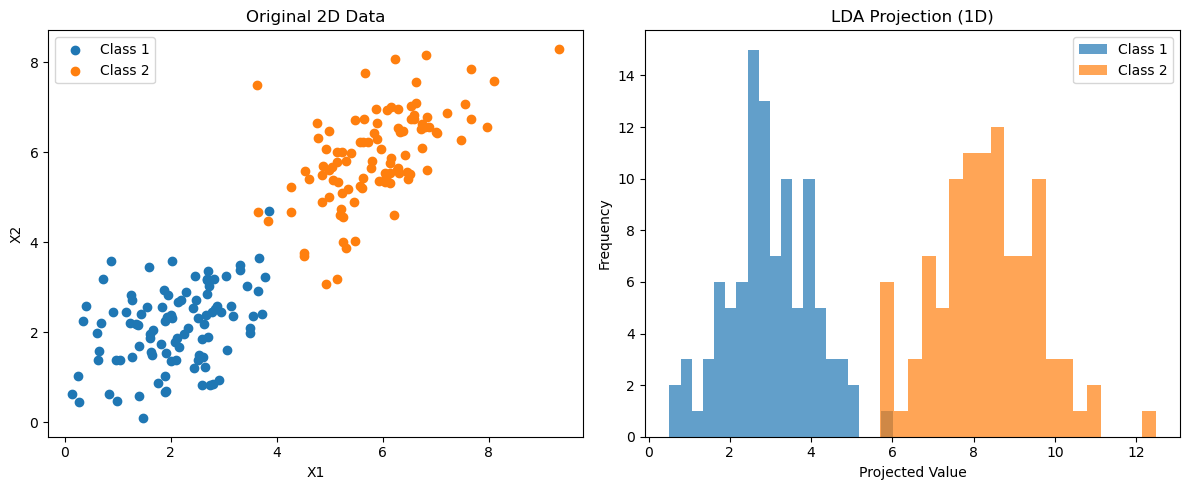

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mean1 = [2, 2]
mean2 = [6, 6]
cov = [[1, 0.5], [0.5, 1]]  # covariance matrix

class1 = np.random.multivariate_normal(mean1, cov, 100)
class2 = np.random.multivariate_normal(mean2, cov, 100)

def lda_projection(X1, X2):
    # Class means
    m1 = np.mean(X1, axis=0)
    m2 = np.mean(X2, axis=0)

    # Scatter matrices
    S1 = (X1 - m1).T @ (X1 - m1)
    S2 = (X2 - m2).T @ (X2 - m2)
    Sw = S1 + S2  # Within-class scatter

    # LDA Weight Vector: w = inv(Sw) * (m2 - m1)
    w = np.linalg.inv(Sw) @ (m2 - m1)

    # Normalize the vector
    w = w / np.linalg.norm(w)
    return w

# Compute LDA vector
w = lda_projection(class1, class2)

# Project points to 1D
proj1 = class1 @ w
proj2 = class2 @ w


# Visualization
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(class1[:, 0], class1[:, 1], label="Class 1")
plt.scatter(class2[:, 0], class2[:, 1], label="Class 2")
plt.title("Original 2D Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(proj1, bins=20, alpha=0.7, label="Class 1")
plt.hist(proj2, bins=20, alpha=0.7, label="Class 2")
plt.title("LDA Projection (1D)")
plt.xlabel("Projected Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()
